In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
mpl.rc('font', family='Malgun Gothic')

In [2]:
df_member = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

In [3]:
p1 = df_product.pivot_table(index='회원번호',
                           values=['구매금액','구매수량'],
                          aggfunc='sum').reset_index()

In [4]:
df_member2 = pd.merge(df_member, p1, on='회원번호', how='inner')

In [5]:
df_product['방문횟수'] = 1 

In [6]:
p2 = df_product.pivot_table(index=['회원번호', '공급일자'], 
                            values='방문횟수', aggfunc='min').reset_index()
p3 = p2.pivot_table(index='회원번호', values = '방문횟수', 
                    aggfunc='sum').reset_index()

In [7]:
df_member3 = pd.merge(df_member2, p3, on='회원번호', how='inner')

In [8]:
df_member3['1회방문구매평균'] = df_member3['구매금액'] / df_member3['방문횟수']
df_member3['1회방문구매평균'].describe()

count      4285.000000
mean      32913.468270
std       25756.734483
min           0.000000
25%       15890.476190
50%       27166.666667
75%       43080.140845
max      329260.000000
Name: 1회방문구매평균, dtype: float64

In [9]:
def func1(row):
    if row > 100000:
        return 'A'
    elif row>=50000:
        return 'B'
    elif row>=20000:
        return 'C'
    else:
        return 'D'

df_member3['고객등급'] = df_member3['1회방문구매평균'].apply(func1)

# Mission 4. (점심)

### 판매 주력상품에 대한 분석을 하고자한다 (df_product)

1) df_product데이터의 구조와 타입을 확인하고 결측값도 확인

In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
 11  방문횟수      735783 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 67.4+ MB


In [11]:
# 풀이
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
 11  방문횟수      735783 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 67.4+ MB


In [12]:
df_product.isnull().sum() # 각 항목 별 결측값 확인
# isnull( ) : 해당 데이터가 결측값인지 아닌지를 True / False 출력 
# sum( ) : 총합을 계산 / 각 항목별 총합이 계산 

공급일자             0
물품코드             0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
구매금액             0
구매매장             0
반품_원거래일자    725446
회원번호            22
방문횟수             0
dtype: int64

2) df_product데이터의 '구매금액'과 '구매수량'의 기술통계량을 확인

In [13]:
df_product[['구매금액', '구매수량']].describe()

,구매금액,구매수량
count,7.357830e+05,735783.000000
mean,5.677010e+03,1.153989
std,8.650792e+03,0.762145
min,-3.600000e+05,-120.000000
25%,2.150000e+03,1.000000
50%,3.800000e+03,1.000000
75%,6.500000e+03,1.000000
max,1.449000e+06,120.000000


3) df_product에서 '물품대분류'중 가장 많이 판매되는 3가지 항목을 확인 (품목별 구매수량의 합이 높은 3개 확인) 

In [14]:
best_seller = df_product['물품대분류'].value_counts().head(3).index.to_list()
best_seller

['채소', '축산물', '간식']

In [15]:
# 풀이
df_product.pivot_table(index='물품대분류', 
                       values='구매수량',
                       aggfunc='sum').sort_values(by='구매수량', ascending=False).head(3)

,구매수량
물품대분류,
채소,210661.70
축산물,155188.75
간식,137427.30


4) 앞서 확인한 3가지 항목을 추출하여 df1_product_top변수로 선언하고, df1_product_top에서 구매매장 별 구매금액의 합과 평균을 계산 

In [16]:
cond1 = (df_product['물품대분류'].isin(best_seller))
df_product_top = df_product.loc[cond1]

df_product_top.pivot_table(index='구매매장', values='구매금액', 
                           aggfunc=['sum', 'mean'])

,sum,mean
,구매금액,구매금액
구매매장,,
매장1,363985400,4770.638426
매장2,461745602,4908.271082
매장3,916748142,4949.910326
매장4,419048570,5019.146844


In [17]:
# 풀이

cond1 = df_product['물품대분류'].isin(['간식','축산물','채소'])
df1_product_top = df_product.loc[cond1]
df1_product_top.pivot_table(index='구매매장', values='구매금액', 
                            aggfunc=['mean','sum'])

,mean,sum
,구매금액,구매금액
구매매장,,
매장1,4770.638426,363985400
매장2,4908.271082,461745602
매장3,4949.910326,916748142
매장4,5019.146844,419048570


5) 공급일자 데이터를 날짜형식으로 변환한 다음 연도/월/요일 을 새로운 파생변수로 선언하시오 ( pd.to_datetime(   , format='%Y%m%d') )

In [18]:
df_product['날짜'] = pd.to_datetime(df_product['공급일자'], format='%Y%m%d')
df_product['연도'] = df_product['날짜'].dt.year
df_product['월'] = df_product['날짜'].dt.month
df_product['요일'] = df_product['날짜'].dt.day_name()
df_product

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,방문횟수,날짜,연도,월,요일
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,1,2017-02-01,2017,2,Wednesday
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,1,2017-02-01,2017,2,Wednesday
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,1,2017-02-01,2017,2,Wednesday
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,1,2017-02-01,2017,2,Wednesday
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,1,2017-02-01,2017,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735778,20170630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0,1,2017-06-30,2017,6,Friday
735779,20170630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0,1,2017-06-30,2017,6,Friday
735780,20170630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0,1,2017-06-30,2017,6,Friday
735781,20170630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0,1,2017-06-30,2017,6,Friday


6) '월'에 따른 '물품대분류'별 '구매금액'의 합을 계산하여 result_p1.xlsx로 저장 

In [19]:
df_product.pivot_table(index='물품대분류', columns='월', 
                       values='구매금액', aggfunc='sum').to_excel('result_p1.xlsx')

7) '요일'데이터에서 토요일과 일요일의 구매금액의 평균의 차이가 있는지 가설검정을 수행  

In [20]:
cond1 = (df_product['요일'].isin(['Saturday', 'Sunday']))
df_weekend = df_product.loc[cond1]

# 7-1) 구매금액 연속형 데이터가 정규성을 따르는가?
#      귀무가설 : 해당 데이터의 분포는 정규분포를 따른다
#      대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다

stats.normaltest(df_weekend['구매금액'])
# p-value < 0.05 | 대립가설 참 | 해당 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=250963.257085467, pvalue=0.0)

In [21]:
# 7-2) 정규성을 따르지 않는 상황에서 토요일과 일요일의 구매금액의 평균 비교
#      귀무가설 : 두 집단의 구매금액의 평균의 차이가 없다.
#      대립가설 : 두 집단의 구매금액의 평균의 차이가 있다.
cond1 = (df_weekend['요일']=='Saturday')
df_saturday = df_weekend.loc[cond1]
cond2 = (df_weekend['요일']=='Sunday')
df1_sunday = df_weekend.loc[cond2]

stats.ranksums(df_saturday['구매금액'], df1_sunday['구매금액'])
# p-value < 0.05 | 대립가설 참 | 두 집단의 구매금액의 평균의 차이가 있다.

RanksumsResult(statistic=-3.0474877976155326, pvalue=0.002307628950574978)

### 고객데이터를 분석하고자 한다 (df_member)

8) df_member 데이터의 구조와 타입을 확인하고 결측값을 확인  

In [22]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB


9) '생년'데이터를 이용해 2023년 기준 나이를 재계산하여 '연령_new'로 선언 

In [23]:
df_member['연령_new'] = 2023 - df_member['생년'] + 1
df_member

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,연령_new
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,57
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,77
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,52
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,55
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,76
...,...,...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,61
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,42
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,49
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,63


10) '연령_new'를 이용해 '연령대'새로운 파생변수를 계산 (10대 /20대 /30대...)  

In [24]:
df_member['연령대'] = (df_member['연령_new'] // 10).astype(str) + '0대'
df_member

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,연령_new,연령대
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,57,50대
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,77,70대
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,52,50대
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,55,50대
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,76,70대
...,...,...,...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,61,60대
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,42,40대
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,49,40대
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,63,60대


In [25]:
# 풀이
def func1(row):
    return str(row)[0] +'0대'

df_member['연령대'] = df_member['연령_new'].apply(func1)
# replace( ) : 기존의 값을 새로운 값으로 변경 
df_member['연령대'].replace('10대','90대이상').replace('90대','90대이상')
df_member['연령대'].replace({'10대':'90대이상','90대':'90대이상'})

0       50대
1       70대
2       50대
3       50대
4       70대
       ... 
4391    60대
4392    40대
4393    40대
4394    60대
4395    50대
Name: 연령대, Length: 4396, dtype: object

### df_member3 데이터를 이용해 매출과 고객 특성에 대한 분석을 하고자 한다

11) '결혼유무'에서 '기혼'에 해당하는 고객들 중, '방문횟수'가 높은 상위 30명의 고객 명단을 추출하여 'result_member.xlsx'로 저장  

In [26]:
cond1 = (df_member3['결혼유무']=='기혼')
df_marry = df_member3.loc[cond1]
df_marry.sort_values(by='방문횟수', ascending = False).head(30).to_excel('result_member.xlsx')

12) '구매금액'의 합이 가장 높은 2개 연령대를 확인하여, 두 연령대 간 '방문횟수'의 평균의 차이가 있는지 가설검정을 수행 

In [27]:
df_member4 = df_member[['회원번호', '연령_new', '연령대']]
df_member3 = pd.merge(df_member3, df_member4, on='회원번호', how='inner')

p12 = df_member3.pivot_table(index='연령대', values='구매금액', aggfunc='sum')
df_member_top = p12.sort_values(by='구매금액', ascending = False).head(2).index.to_list()
df_member_top
# 50대, 40대 확인

['50대', '40대']

In [28]:
cond1 = (df_member3['연령대'].isin(['50대', '40대']))
df_vip_age = df_member3.loc[cond1]

# 12-1) 방문횟수 연속형 데이터가 정규성을 따르는가?
#       귀무가설 : 해당 데이터의 분포는 정규분포를 따른다
#       대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다

stats.normaltest(df_vip_age['방문횟수'])
# p-value < 0.05 | 대립가설 참 | 해당 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=1041.5350436189851, pvalue=6.816146618022918e-227)

In [29]:
# 12-2) 40대와 50대의 방문횟수의 평균의 차이가 있는가?
#       귀무가설 : 40대와 50대의 방문횟수의 평균의 차이가 없다. 
#       대립가설 : 40대와 50대의 방문횟수의 평균의 차이가 있다.
cond1 = (df_vip_age['연령대']=='50대')
df_50s = df_vip_age.loc[cond1]
cond2 = (df_vip_age['연령대']=='40대')
df_40s = df_vip_age.loc[cond2]

stats.ranksums(df_50s['방문횟수'], df_40s['방문횟수'])
# p-value > 0.05 | 귀무가설 참(귀무가설 기각 실패) | 두 집단의 구매금액의 평균의 차이가 없다.

RanksumsResult(statistic=1.5356357164914587, pvalue=0.12462774925460733)

In [30]:
#풀이
df_member3['연령_new'] = 2023 - df_member3['생년'] +1 

In [31]:
df_member3['연령대'] = df_member3['연령_new'].apply(func1)
df_member3.pivot_table(index='연령대',values='구매금액',aggfunc='sum')

,구매금액
연령대,
10대,5490030
20대,7100
30대,74853085
40대,1154840902
50대,1592537145
60대,714931621
70대,467509445
80대,149850385
90대,16864275


In [32]:
cond1 = df_member3['연령대'].isin(['40대','50대'])
# 12-1) 40,50대 고객명단의 방문횟수 데이터가 정규성을 따르는가? 
stats.normaltest(df_member3.loc[cond1]['방문횟수'])
# P.value < 0.05 / 대립가설 참 / 정규분포를 띄지 않는다 

NormaltestResult(statistic=1041.5350436189851, pvalue=6.816146618022918e-227)

In [33]:
# 12-2 ) 귀무가설 : 40대와 50대의 방문횟수의 평균의 차이가 없다. 
#        대립가설 : 40대와 50대의 방문횟수의 평균의 차이가 있다.
cond1 = (df_member3['연령대']=='40대')
cond2 = (df_member3['연령대']=='50대')
df_member3_40 = df_member3.loc[cond1]
df_member3_50 = df_member3.loc[cond2]
stats.ranksums(df_member3_40['방문횟수'], df_member3_50['방문횟수'])
# P.value > 0.05 / 귀무가설 참 / 40대와 50대의 방문횟수의 평균의 차이가 없다. 

RanksumsResult(statistic=-1.5356357164914587, pvalue=0.12462774925460733)

13) '성별' 별 '구매금액'에 대한 평균을 시각화 하시오.

<BarContainer object of 2 artists>

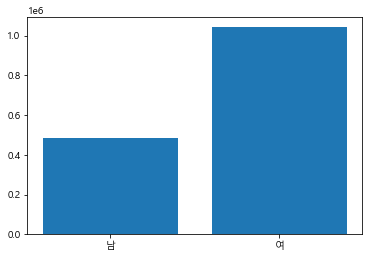

In [34]:
p13 = df_member3.pivot_table(index='성별', values='구매금액', aggfunc='mean').reset_index()
plt.bar(p13['성별'], p13['구매금액'])

<AxesSubplot:xlabel='성별', ylabel='구매금액'>

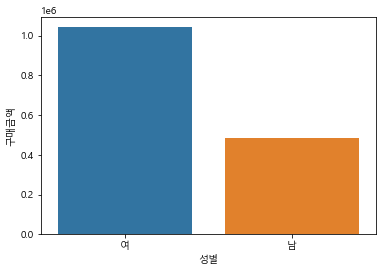

In [35]:
# 풀이
sns.barplot(data=df_member3, x='성별', y='구매금액',ci=None)